# Unsupervised Model

### Building a K-Means

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

total_data = pd.read_csv('/workspaces/JLL_K-means_Unsupervised_ML/data/raw/total_data.csv')
total_data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


* Divide Train/test

In [54]:
from sklearn.model_selection import train_test_split

X = total_data

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)


* Fit the model K-means

In [55]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 6, random_state = 42)
kmean.fit(X_train)
cluster_train = kmean.predict(X_train)

* Including the results of clusters and Graphic the values predicing with the data test

In [56]:
X_train['Cluster'] = cluster_train
X_train.head()


,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,2
8267,33.77,-118.16,3.8125,2
17445,34.66,-120.48,4.1563,0
14265,32.69,-117.11,1.9425,2
2271,36.78,-119.80,3.5542,0


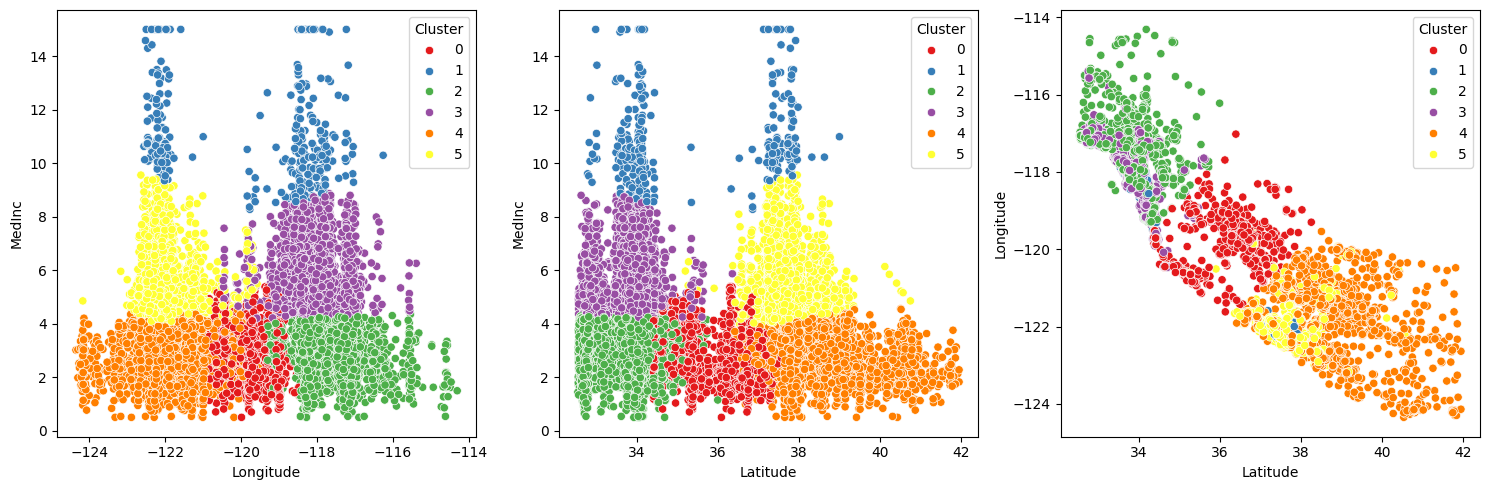

In [57]:
fig, axis = plt.subplots(figsize = (15,5), ncols = 3)

sns.scatterplot(ax = axis[0], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[2], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.tight_layout()
plt.show()

In [58]:
cluster_test = kmean.predict(X_test)
X_test['Cluster'] = cluster_test

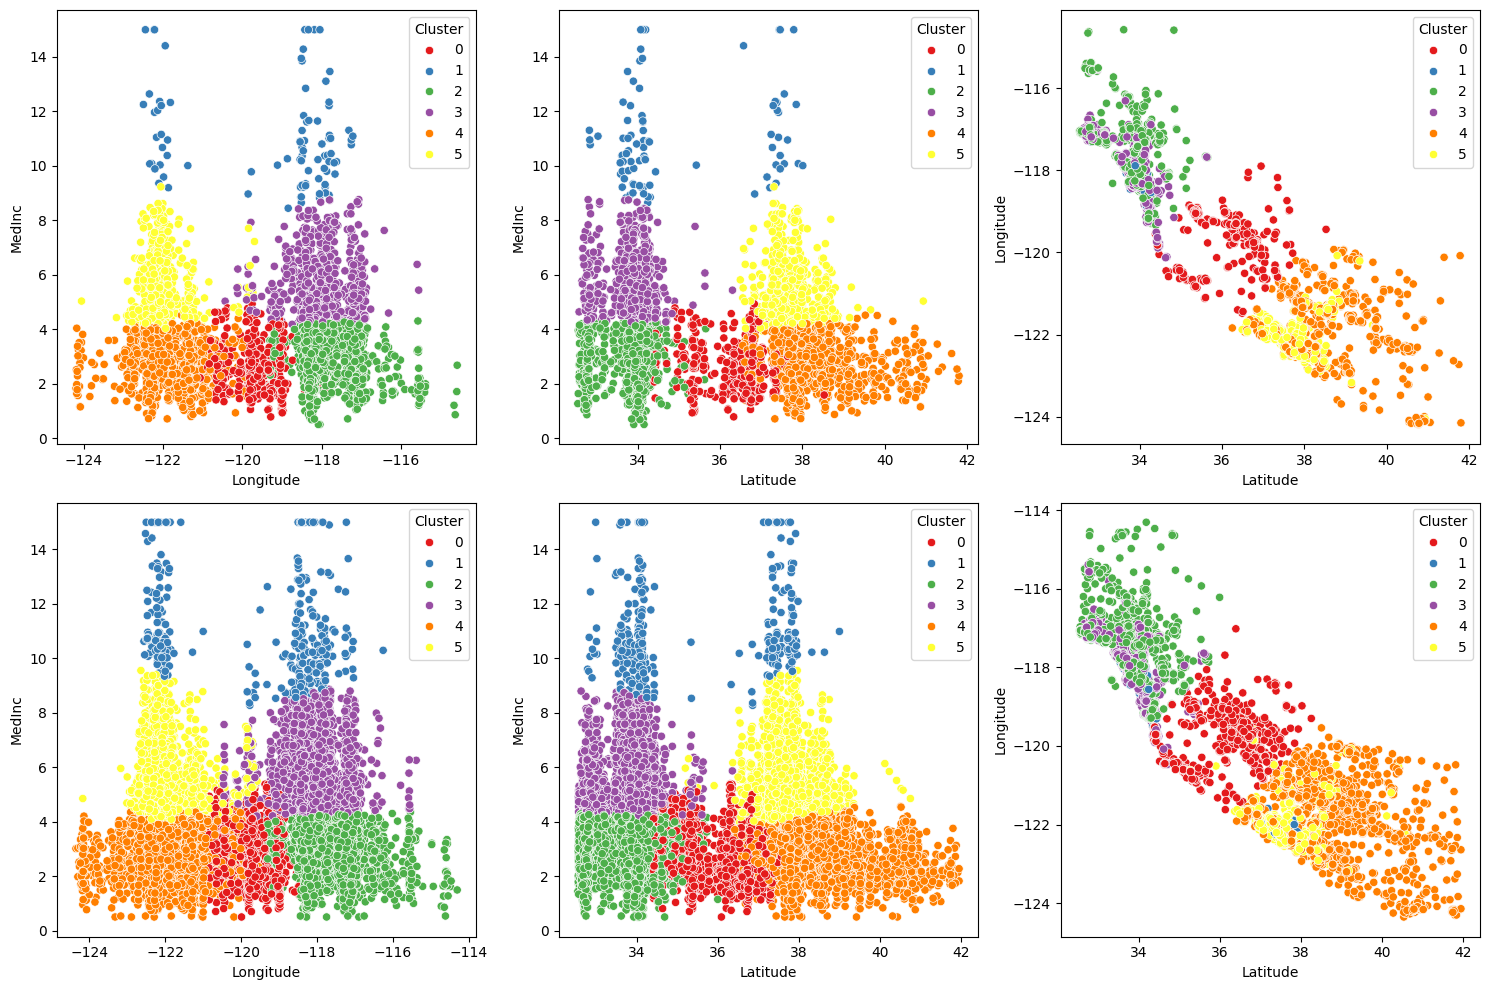

In [59]:
fig, axis = plt.subplots(2,3, figsize = (15,10))

sns.scatterplot(ax = axis[0,0], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[0,1], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[0,2], data = X_test, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,0], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,2], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.tight_layout()
plt.show()

***Conclussions***

# Supervised Model

### KNN Model

In [60]:
y_train = X_train["Cluster"]
X_train = X_train.drop("Cluster", axis = 1)

y_test = X_test["Cluster"]
X_test = X_test.drop("Cluster", axis = 1)


In [61]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_pred_train = model.predict(X_train)
y_pred_train

array([2, 2, 0, ..., 2, 5, 4], dtype=int32)

In [63]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 4, ..., 5, 0, 2], dtype=int32)

In [64]:
from sklearn.metrics import accuracy_score

print("Accuracy test:", accuracy_score(y_test, y_pred))
print("Accuracy train:", accuracy_score(y_train, y_pred_train))

Accuracy test: 0.9910368217054264
Accuracy train: 0.9958817829457365


In [65]:
from pickle import dump

dump(model, open("/workspaces/JLL_K-means_Unsupervised_ML/models/knn_classifier_default.sav", "wb"))
dump(kmean, open("/workspaces/JLL_K-means_Unsupervised_ML/models/k-mean.sav", "wb"))

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred_LR = model_LR.predict(X_test)
y_pred_LR

array([0, 2, 4, ..., 5, 4, 2], dtype=int32)

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_LR)

0.9239341085271318

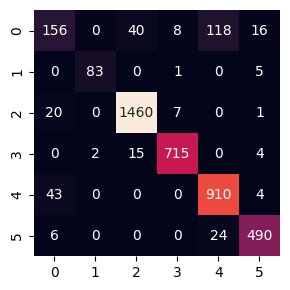

In [69]:
from sklearn.metrics import confusion_matrix

california_cm = confusion_matrix(y_test, y_pred_LR)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

### Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred_NB = model.predict(X_test)
y_pred_NB

array([0, 0, 4, ..., 5, 0, 2], dtype=int32)

In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_NB)

0.9910368217054264

***Conclussion: The best model is a KNN!***